In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [20, 8]

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-9j2iy3js because the default path (/home/jovyan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [6]:
df = pd.read_csv("./data/degrees-that-pay-back.csv") # unix style file path

In [7]:
df[:3]

Undergraduate Major Starting Median Salary Mid-Career Median Salary  \
0             Accounting             $46,000.00               $77,100.00   
1  Aerospace Engineering             $57,700.00              $101,000.00   
2            Agriculture             $42,600.00               $71,900.00   

   Percent change from Starting to Mid-Career Salary  \
0                                               67.6   
1                                               75.0   
2                                               68.8   

  Mid-Career 10th Percentile Salary Mid-Career 25th Percentile Salary  \
0                        $42,200.00                        $56,100.00   
1                        $64,300.00                        $82,100.00   
2                        $36,300.00                        $52,100.00   

  Mid-Career 75th Percentile Salary Mid-Career 90th Percentile Salary  
0                       $108,000.00                       $152,000.00  
1                       $127,000.00                       $161,000.00  
2                        $96,300.00                       $150,000.00

In [8]:
df.describe()

Percent change from Starting to Mid-Career Salary
count                                          50.000000
mean                                           69.274000
std                                            17.909908
min                                            23.400000
25%                                            59.125000
50%                                            67.800000
75%                                            82.425000
max                                           103.500000

## Conversion
Convert dollar string to float.

In [9]:
df['Starting Median Salary'] = df['Starting Median Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

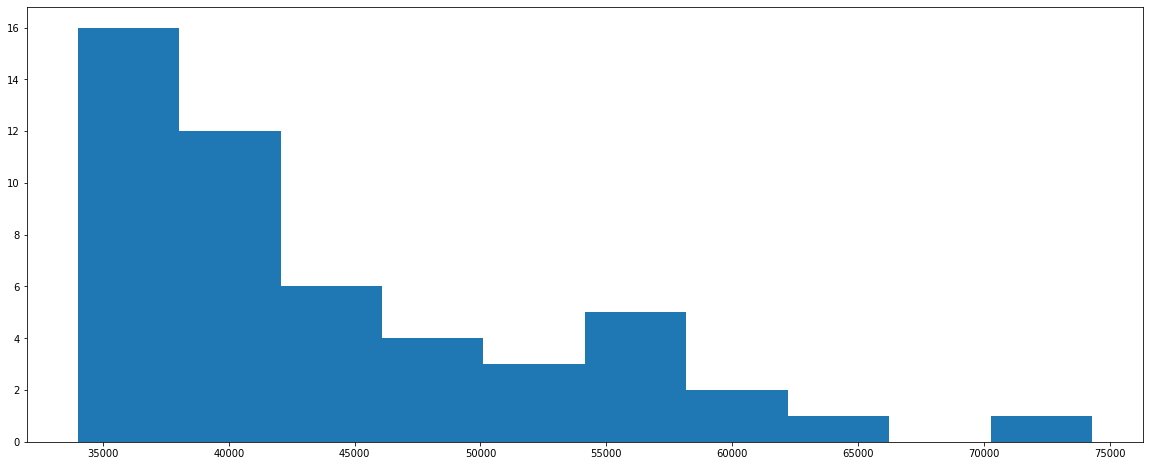

In [10]:
fig, ax = plt.subplots()
ax.hist(df['Starting Median Salary'], bins=10)
plt.show()

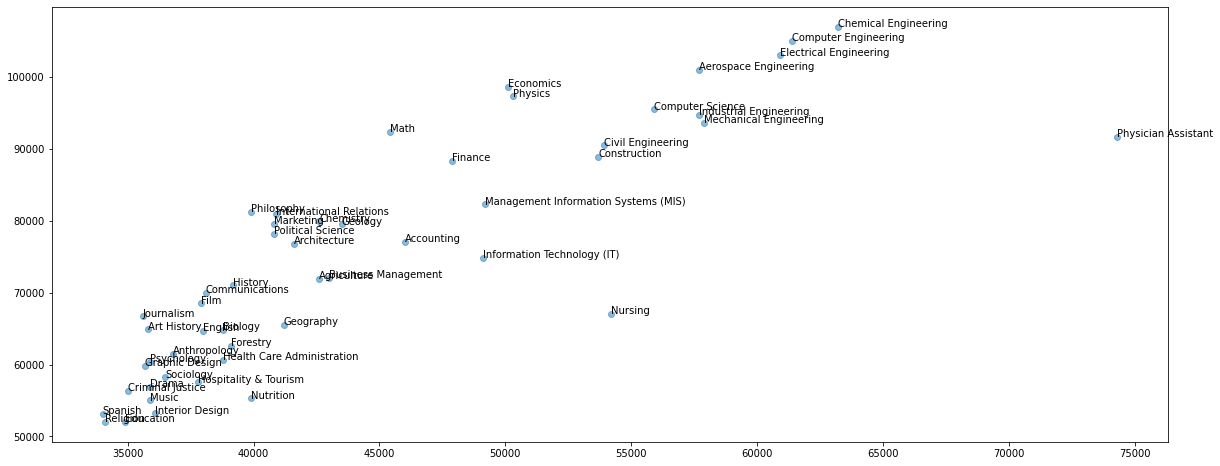

In [11]:
fig, ax = plt.subplots()
plt.scatter(df['Starting Median Salary'], df['Mid-Career Median Salary'], alpha=0.5)

for i, txt in enumerate(df['Undergraduate Major']):
    ax.annotate(txt, (df['Starting Median Salary'][i], df['Mid-Career Median Salary'][i]))
    
plt.show()

In [14]:
df = pd.read_csv("./data/salaries-by-region.csv") # window style data\salaries-by-region.csv

In [15]:
df.head()

School Name      Region  \
0                       Stanford University  California   
1  California Institute of Technology (CIT)  California   
2                       Harvey Mudd College  California   
3        University of California, Berkeley  California   
4                        Occidental College  California   

  Starting Median Salary Mid-Career Median Salary  \
0             $70,400.00              $129,000.00   
1             $75,500.00              $123,000.00   
2             $71,800.00              $122,000.00   
3             $59,900.00              $112,000.00   
4             $51,900.00              $105,000.00   

  Mid-Career 10th Percentile Salary Mid-Career 25th Percentile Salary  \
0                        $68,400.00                        $93,100.00   
1                               NaN                       $104,000.00   
2                               NaN                        $96,000.00   
3                        $59,500.00                        $81,000.00   
4                               NaN                        $54,800.00   

  Mid-Career 75th Percentile Salary Mid-Career 90th Percentile Salary  
0                       $184,000.00                       $257,000.00  
1                       $161,000.00                               NaN  
2                       $180,000.00                               NaN  
3                       $149,000.00                       $201,000.00  
4                       $157,000.00                               NaN

In [16]:
df['Starting Median Salary'] = df['Starting Median Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
df['Mid-Career 75th Percentile Salary'] = df['Mid-Career 75th Percentile Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
df = df[['Region','School Name','Starting Median Salary', 'Mid-Career 75th Percentile Salary']]

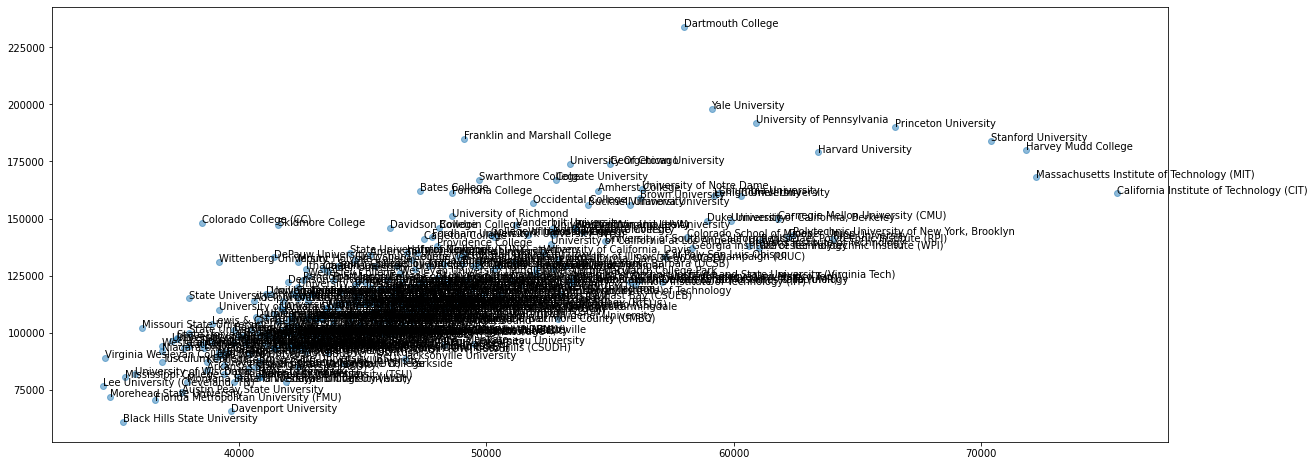

In [17]:
fig, ax = plt.subplots()
plt.scatter(df['Starting Median Salary'], df['Mid-Career 75th Percentile Salary'], alpha=0.5)

for i, txt in enumerate(df['School Name']):
    ax.annotate(txt, (df['Starting Median Salary'][i], df['Mid-Career 75th Percentile Salary'][i]))
    
plt.show()

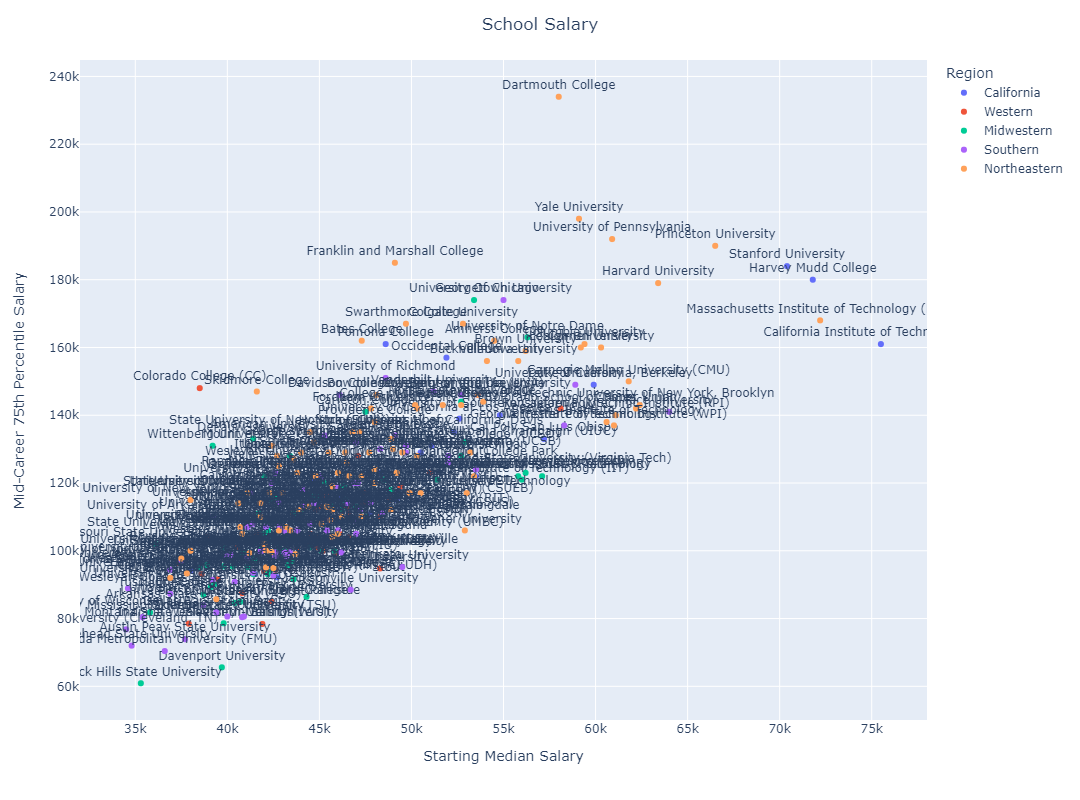

In [18]:
import plotly.express as px
plt.rcParams['figure.figsize'] = [20, 14]
fig = px.scatter(df, x="Starting Median Salary", y="Mid-Career 75th Percentile Salary", color='Region', text="School Name", height=800)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='School Salary', title_x=0.5)
fig.show()

In [19]:
df3 = pd.DataFrame(index=df.index)
df3['Region'] = df['Region']
df3['Size'] = 10
df3[df['School Name'].isin(["University of Southern Maine","Mercy College"])] = ['Highlight',100]

In [20]:
df3

Region  Size
0      California    10
1      California    10
2      California    10
3      California    10
4      California    10
..            ...   ...
315  Northeastern    10
316  Northeastern    10
317  Northeastern    10
318     Highlight   100
319     Highlight   100

[320 rows x 2 columns]

In [21]:
df2 = pd.DataFrame(index=df.index)
df2['Color']='Blue'
schoolname="New York"
df2[df['School Name'].str.contains(schoolname)] = 'Red'

In [22]:
df

Region                                      School Name  \
0      California                              Stanford University   
1      California         California Institute of Technology (CIT)   
2      California                              Harvey Mudd College   
3      California               University of California, Berkeley   
4      California                               Occidental College   
..            ...                                              ...   
315  Northeastern   State University of New York (SUNY) at Potsdam   
316  Northeastern                               Niagara University   
317  Northeastern  State University of New York (SUNY) at Fredonia   
318  Northeastern                     University of Southern Maine   
319  Northeastern                                    Mercy College   

     Starting Median Salary  Mid-Career 75th Percentile Salary  
0                   70400.0                           184000.0  
1                   75500.0                           161000.0  
2                   71800.0                           180000.0  
3                   59900.0                           149000.0  
4                   51900.0                           157000.0  
..                      ...                                ...  
315                 38000.0                           100000.0  
316                 36900.0                            92000.0  
317                 37800.0                            93300.0  
318                 39400.0                            85700.0  
319                 43700.0                            99000.0  

[320 rows x 4 columns]

In [23]:
pd.concat([df,df2], axis=1)

Region                                      School Name  \
0      California                              Stanford University   
1      California         California Institute of Technology (CIT)   
2      California                              Harvey Mudd College   
3      California               University of California, Berkeley   
4      California                               Occidental College   
..            ...                                              ...   
315  Northeastern   State University of New York (SUNY) at Potsdam   
316  Northeastern                               Niagara University   
317  Northeastern  State University of New York (SUNY) at Fredonia   
318  Northeastern                     University of Southern Maine   
319  Northeastern                                    Mercy College   

     Starting Median Salary  Mid-Career 75th Percentile Salary Color  
0                   70400.0                           184000.0  Blue  
1                   75500.0                           161000.0  Blue  
2                   71800.0                           180000.0  Blue  
3                   59900.0                           149000.0  Blue  
4                   51900.0                           157000.0  Blue  
..                      ...                                ...   ...  
315                 38000.0                           100000.0   Red  
316                 36900.0                            92000.0  Blue  
317                 37800.0                            93300.0   Red  
318                 39400.0                            85700.0  Blue  
319                 43700.0                            99000.0  Blue  

[320 rows x 5 columns]